#Atividade
 
 
*   Entregar um documento COLAB do Google com os resultados da classificação dos dados WINE da base UCI. Destacar o uso ou não de transformação, redução de espaço, complementação dos dados, descarte de dados, visualização dos dados, etc. Apontar as técnicas empregadas

#### 1.   *Importações dos módulos gerais e funções* 

    * Aqui serão importados o numpy, o pandas e o matplotlib/seaborn para plots




In [ ]:
# This is not strictly for a Python rather. 
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()                         #Configura os plots do matplotlib para terem os mesmos estilos do seaborn
sns.set_style("whitegrid")        #Alterando o estilo do plot para melhor vizualização no colab (Tema escuro fica ruim de ver o fundo)

    *  Aqui serão importados os módulos do sklearn para realizar o K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
def KNN_k_find(x: np.ndarray, y: np.ndarray, max_k: int) -> list:
  '''
  returns a list with the accuracy of a K-Nearest Neighbors for different "n_neighbors" values

  PARAMETERS:
      x (np.ndarray): Data Predictors
      y (np.ndarray): Data Classes
      max_k (int): Max value of "n_neighbors"

  RETURNS:
      (list): list with different values of accuracy stored in

  '''
  accuracy = []

  for _ in range(1, max_k + 1):

    clf_knn = KNN(n_neighbors = _)
    clf_knn.fit(x, y)
    test_predict = clf_knn.predict(x)
    accuracy.append(accuracy_score(y, test_predict) * 100)

  return accuracy

#### 2.   Leitura dos Datasets
      *   O dataset "Wine UCI"
      *   O dataset será retirado de um repositório pessoal do GITHUB


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Berawecker/Datasets/main/Wine%20UCI.csv')
data

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,3.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,3.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,3.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0
177,3.0,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0


#### 3.   Limpeza dos dados

A única limpeza necessária no dataset é a remoção da ultima linha que é apenas composta por dados faltantes.

In [ ]:
data = data.drop(178, axis = 0)
data

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,3.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,3.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,3.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


#### 4.   Gráficos dos dados inalterados

    * Contabilização das classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Wine dataset')

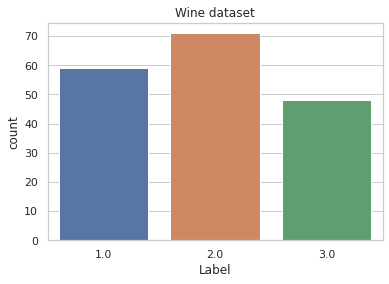

In [ ]:
sns.countplot(data['Label']).set_title("Wine dataset")

In [ ]:
data['Label'].value_counts()

2.0    71
1.0    59
3.0    48
Name: Label, dtype: int64

O dataset possui classes desbalanceadas visto que a classe 2 é a que possui mais dados e a classe 3 possui menos.

In [ ]:
data.describe()

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


    * Cálculo e plot da matriz de correlação

Text(0.5, 1.0, 'Matriz de correlação do Wine')

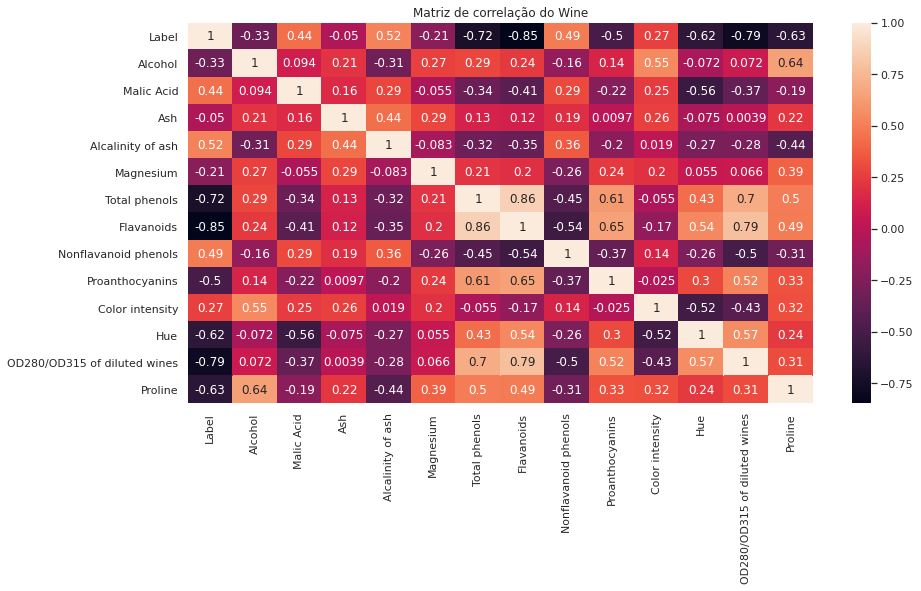

In [ ]:
plt.figure(figsize = (14,7))
sns.heatmap(data.corr(), color = 'k', annot = True).set_title("Matriz de correlação do Wine")

É possivel ver que alguns dados possuem grandes correlações positiva com outras variáveis ("Total phenols" e "Flavanoids" por exemplo), algumas negativas e alguns dados possuem correlação quase nula com outros.

    * Pairplot do dataset para melhor visualização das caracteristicas de correlação

In [ ]:
pair_plot = sns.pairplot(data, hue = "Label", palette = "brg")
pair_plot.fig.suptitle("Pairplot do dataset Wine", fontsize = 15, x = 0.475, y = 1.01)

Output hidden; open in https://colab.research.google.com to view.

Aqui é possivel ver de forma mais gráfica as correlações mostradas no heatmap acima. É possivel ver mais nitidamente a relação linear que "Total phenols" e "Flavanoids" possue e a pouca correlação que muitos dados possuem entre si como "Alcalinity of ash" e "Magnesium"

#### 5. Transformação do espaço

O dataset Wine em si não precisa de transformação do espaço visto que já existem diversos trabalhos na internet ondem mostram que não é necessário, mas aqui será mostrado qual o efeito da transformação de espaço no dataset. Primeiramente será realizado a normalização dos dados visto que o módulo PCA do sklearn não faz isso automaticamente.

In [ ]:
standard_scaler = StandardScaler()
scaler = standard_scaler.fit_transform(data.iloc[:, 1:].values)

In [ ]:
data_standardized = data.copy()
data_standardized.iloc[:, 1:] = scaler
data_standardized

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1.0,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1.0,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.0,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1.0,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.0,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,3.0,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,3.0,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,3.0,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [ ]:
pca = PCA()
pca.fit(data_standardized.iloc[:, 1:].values)
print(pca.explained_variance_ratio_)
sum = 0
for i in range(9):
  sum += pca.explained_variance_ratio_[i]
print(sum)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
0.9423969775056236


com apenas os 9 primeiros componentes principais se têm uma representaçâo de 94% dos dados. Serão utilizados estes 9 componentes principais para se fazer a classificação.

In [ ]:
pca = PCA(n_components = 9)
columns = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9"]
data_transformed = pca.fit_transform(data_standardized.iloc[:, 1:].values)
data_transformed = pd.DataFrame(data_transformed, columns = columns)
data_transformed["Outcome"] = data["Label"]
data_transformed

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,Outcome
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,1.0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,1.0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,1.0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,1.0
...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,3.0
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,3.0
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,3.0
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,3.0


Text(0.475, 1.01, 'Pairplot do dataset Wine com PCA')

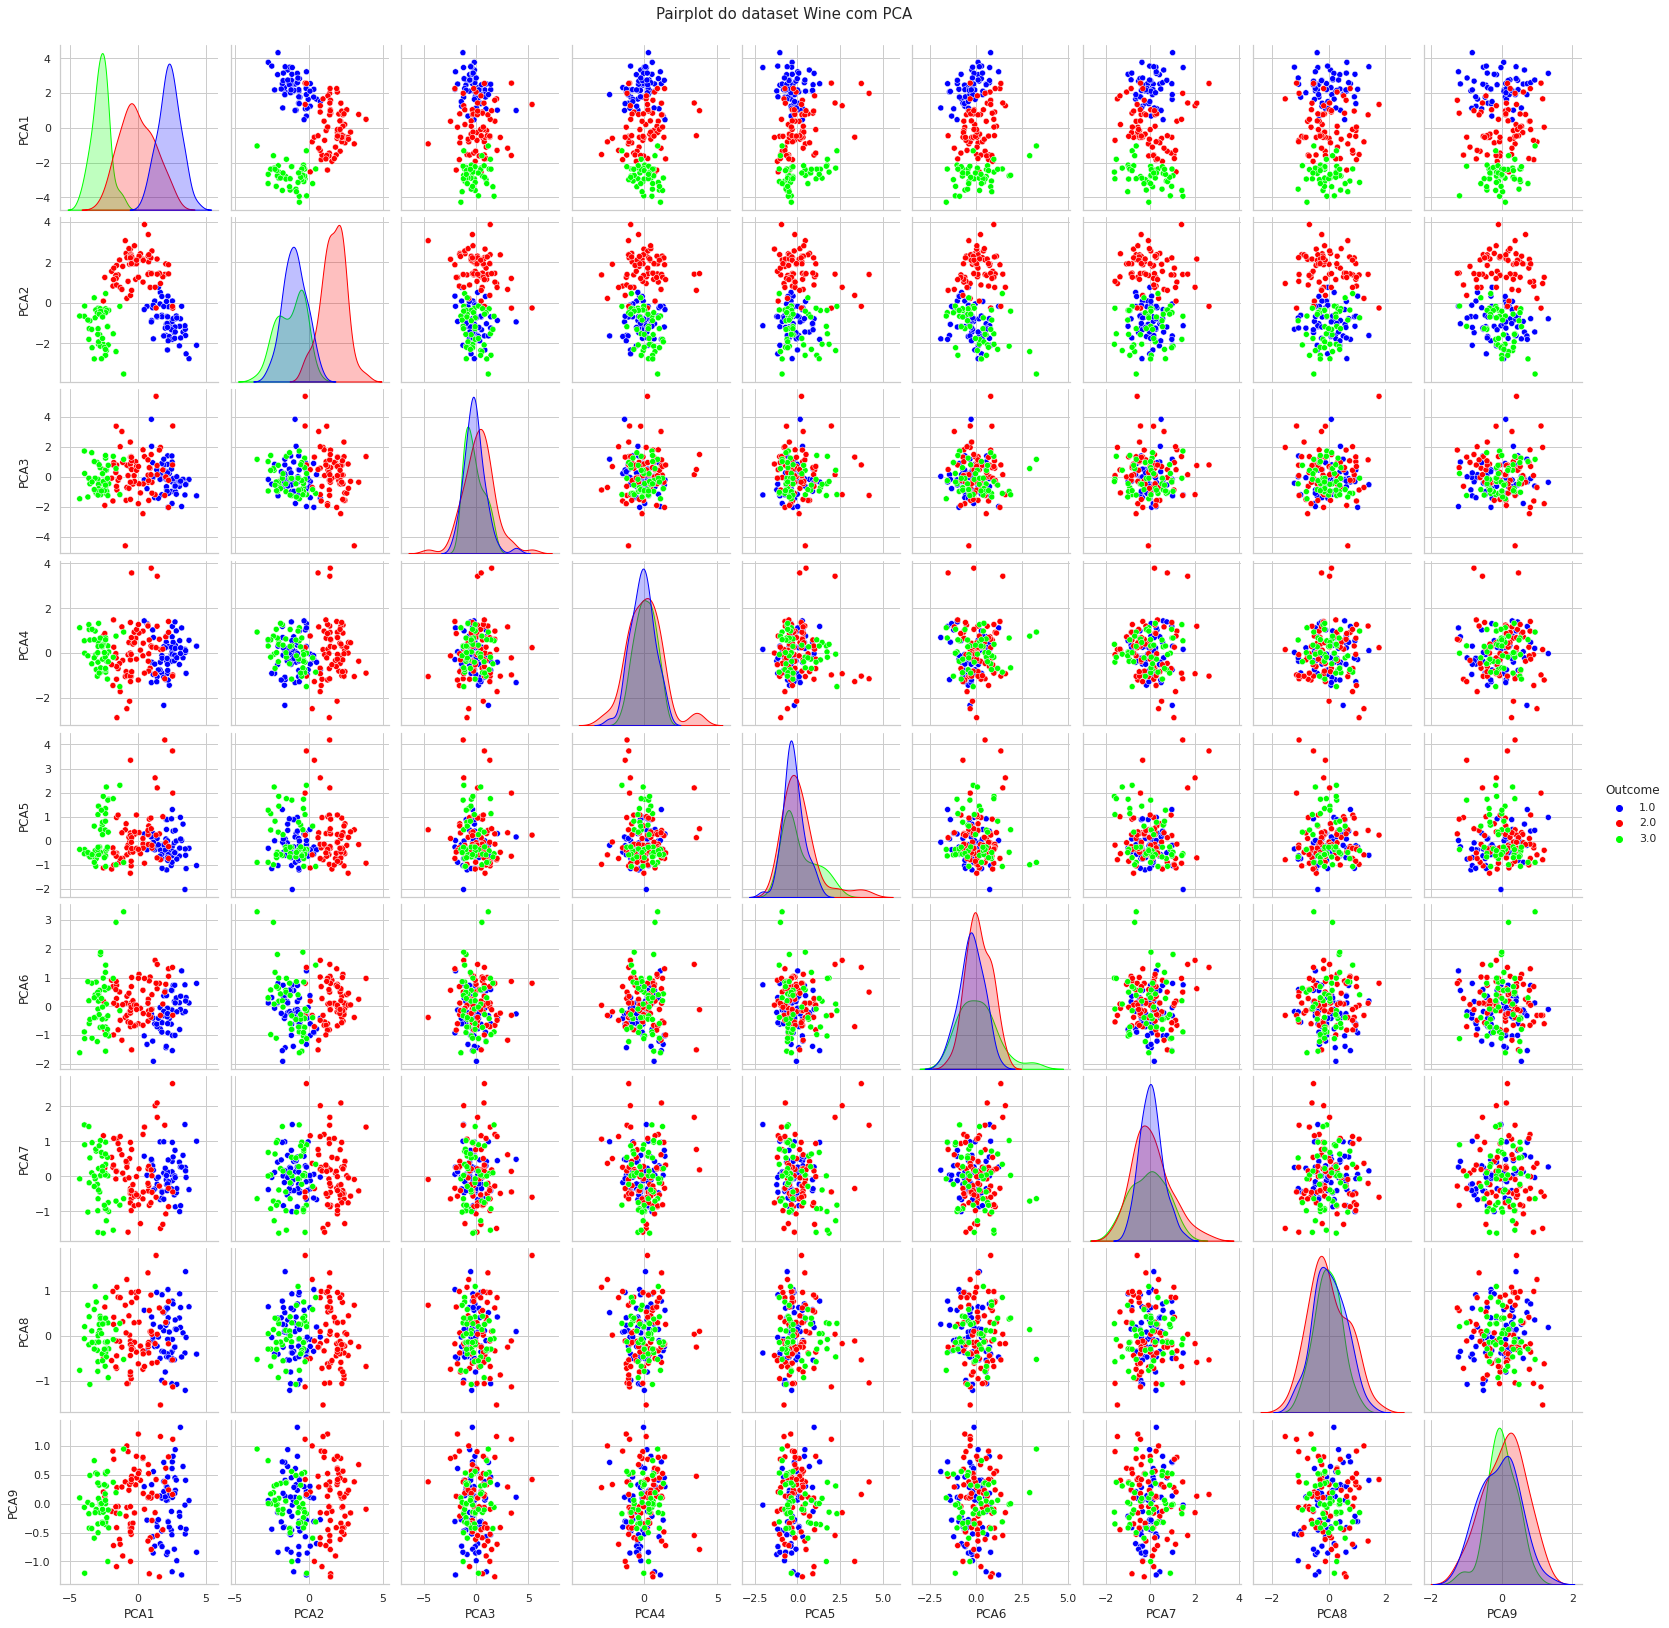

In [ ]:
pair_plot = sns.pairplot(data_transformed, hue = "Outcome", palette = "brg")
pair_plot.fig.suptitle("Pairplot do dataset Wine com PCA", fontsize = 15, x = 0.475, y = 1.01)

#### 6. KNN com os dados brutos

    * Encontrando o melhor valor de "n_neighbors"

In [ ]:
previsores_wine = data.iloc[:, 1:].values
classes_wine = data.iloc[:, 0].values

In [ ]:
#Escolhendo o valor máximo de n_neighbors(k)
k_wine = int(round(np.sqrt(len(classes_wine))))   #O "k" é geralmente escolhido pela raiz quadrada da quantidades de dados usados para o treino

print(f"k máximo wine = {k_wine}")

k máximo wine = 13


[100.0, 87.64044943820225, 87.07865168539325, 82.58426966292134, 78.65168539325843, 77.52808988764045, 74.71910112359551, 77.52808988764045, 77.52808988764045, 79.21348314606742, 76.96629213483146, 77.52808988764045, 75.84269662921348]


Text(0, 0.5, 'Accuracy')

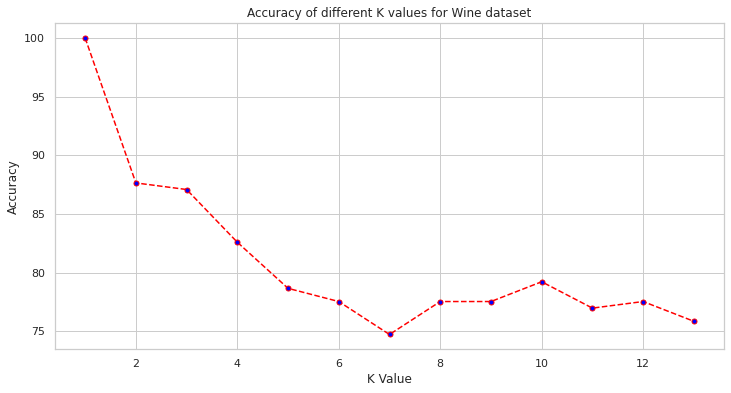

In [ ]:
#Plotando o gráfico de acurácia do wine
wine_k_list = KNN_k_find(previsores_wine, classes_wine, k_wine)
print(wine_k_list)

plt.figure(figsize=(12, 6))
plt.plot(range(1, k_wine + 1), wine_k_list, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 5)
plt.title('Accuracy of different K values for Wine dataset')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

O melhor valor de do parâmetro "n_neighbors" é 2. Ele será utilizado para criar o classificador.

In [ ]:
clf_knn = KNN(n_neighbors = 2)
clf_knn.fit(previsores_wine, classes_wine)
test_predict = clf_knn.predict(previsores_wine)
accuracy = accuracy_score(classes_wine, test_predict) * 100
print(accuracy)

87.64044943820225


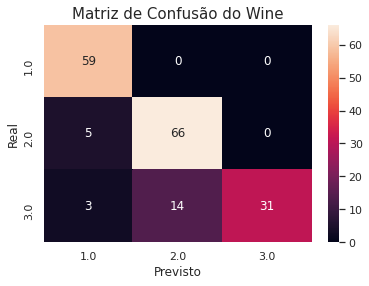

In [ ]:
#Plotando a matriz de confusão
wine_matrix = confusion_matrix(classes_wine, test_predict)
heatmap_wine = pd.DataFrame(wine_matrix, columns=np.unique(classes_wine), index = np.unique(classes_wine))

heatmap_wine.index.name = 'Real'
heatmap_wine.columns.name = 'Previsto'
plt.title("Matriz de Confusão do Wine", fontsize = 15)

sns.heatmap(heatmap_wine, annot=True)

#### 7. KNN com os dados transformados

    * Encontrando o melhor valor de "n_neighbors"

In [ ]:
previsores_wine_t = data_transformed.iloc[:, :9].values
classes_wine_t = data_transformed.iloc[:, 9].values

In [ ]:
#Escolhendo o valor máximo de n_neighbors(k)
k_wine_t = int(round(np.sqrt(len(classes_wine_t))))   #O "k" é geralmente escolhido pela raiz quadrada da quantidades de dados usados para o treino

print(f"k máximo wine transformed = {k_wine_t}")

k máximo wine transformed = 13


[100.0, 97.19101123595506, 96.62921348314607, 96.62921348314607, 97.75280898876404, 96.62921348314607, 97.75280898876404, 98.31460674157303, 98.31460674157303, 97.19101123595506, 97.75280898876404, 97.19101123595506, 97.19101123595506]


Text(0, 0.5, 'Accuracy')

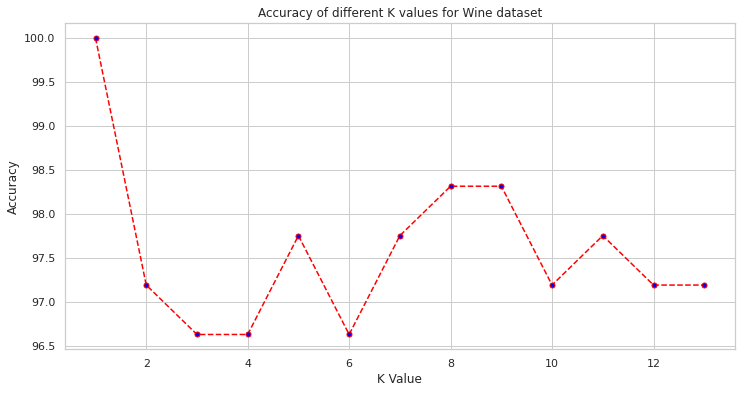

In [ ]:
#Plotando o gráfico de acurácia do wine
wine_t_k_list = KNN_k_find(previsores_wine_t, classes_wine_t, k_wine_t)
print(wine_t_k_list)

plt.figure(figsize=(12, 6))
plt.plot(range(1, k_wine_t + 1), wine_t_k_list, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 5)
plt.title('Accuracy of different K values for Wine dataset')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

O melhor valor do parâmetro "n_neighbors" é 9. Ele será utilizado para criar o classificador.

In [ ]:
clf_knn_t = KNN(n_neighbors = 9)
clf_knn_t.fit(previsores_wine_t, classes_wine_t)
test_predict_t = clf_knn_t.predict(previsores_wine_t)
accuracy_t = accuracy_score(classes_wine_t, test_predict_t) * 100
print(accuracy_t)

98.31460674157303


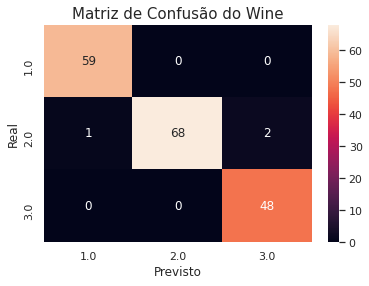

In [ ]:
#Plotando a matriz de confusão
wine_t_matrix = confusion_matrix(classes_wine_t, test_predict_t)
heatmap_wine_t = pd.DataFrame(wine_t_matrix, columns=np.unique(classes_wine_t), index = np.unique(classes_wine_t))

heatmap_wine_t.index.name = 'Real'
heatmap_wine_t.columns.name = 'Previsto'
plt.title("Matriz de Confusão do Wine", fontsize = 15)

sns.heatmap(heatmap_wine_t, annot=True)

#### 8. Resultados

Após a classificação, ficou visivel como a redução do espaço ajudou o algoritmo a ter resultados melhores.